<font size='6'>
  Data Visualization with Python Matplotlib for Beginner<br>
</font>

---

# Line Chart

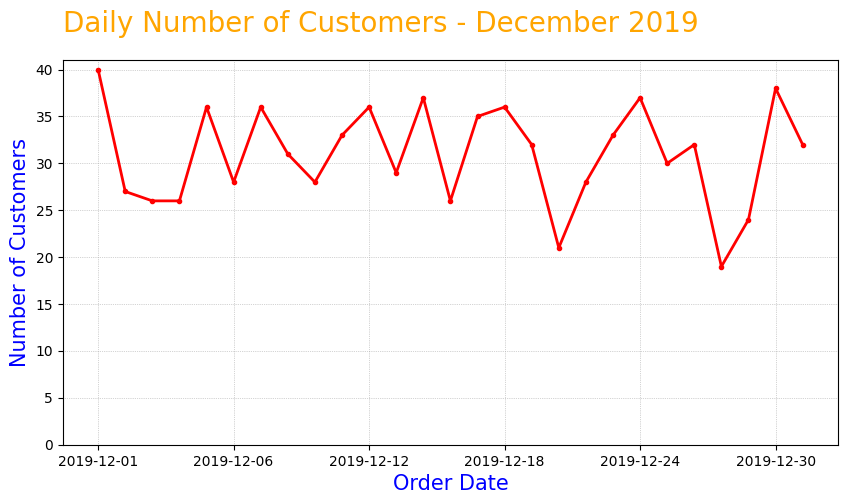

In [ ]:
# Import library yang dibutuhkan
import datetime
import pandas as pd
import matplotlib.pyplot as plt
# Baca dataset https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
# Buat kolom order_month
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
# Buat kolom gmv
dataset['gmv'] = dataset['item_price'] * dataset['quantity']
# Plot grafik sesuai dengan instruksi
plt.figure(figsize=(10, 5))
dataset[dataset['order_month']=='2019-12'].groupby(['order_date'])['customer_id'].nunique().plot(color='red', marker='.', linewidth=2)
plt.title('Daily Number of Customers - December 2019', loc='left', pad=20, fontsize=20, color='orange')
plt.xlabel('Order Date', fontsize=15, color='blue')
plt.ylabel('Number of Customers', fontsize=15, color='blue')
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
plt.show()

---

# Pie Chart

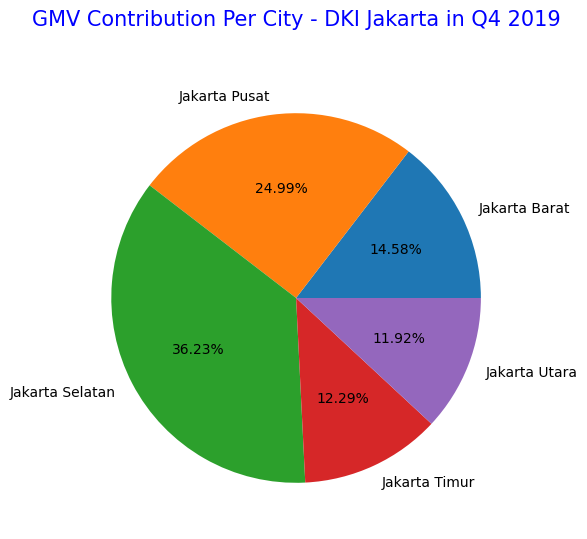

In [ ]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
dataset_dki_q4 = dataset[(dataset['province']=='DKI Jakarta') & (dataset['order_month'] >= '2019-10')]

gmv_per_city_dki_q4 = dataset_dki_q4.groupby('city')['gmv'].sum().reset_index()
plt.figure(figsize=(6,6))
plt.pie(gmv_per_city_dki_q4['gmv'], labels = gmv_per_city_dki_q4['city'],autopct='%1.2f%%')
plt.title('GMV Contribution Per City - DKI Jakarta in Q4 2019',loc='center',pad=30, fontsize=15, color='blue')
plt.show()

---

# Bar Chart

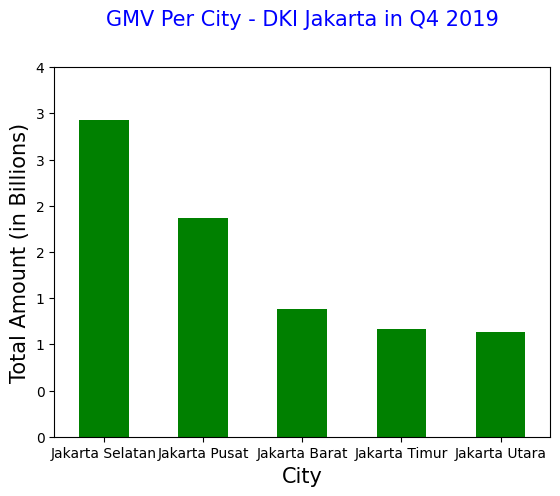

In [ ]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
dataset_dki_q4 = dataset[(dataset['province']=='DKI Jakarta') & (dataset['order_month'] >= '2019-10')]

plt.clf()
dataset_dki_q4.groupby('city')['gmv'].sum().sort_values(ascending=False).plot(kind='bar', color='green')
plt.title('GMV Per City - DKI Jakarta in Q4 2019',loc='center',pad=30, fontsize=15, color='blue')
plt.xlabel('City', fontsize = 15)
plt.ylabel('Total Amount (in Billions)',fontsize = 15)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.xticks(rotation=0)
plt.show()

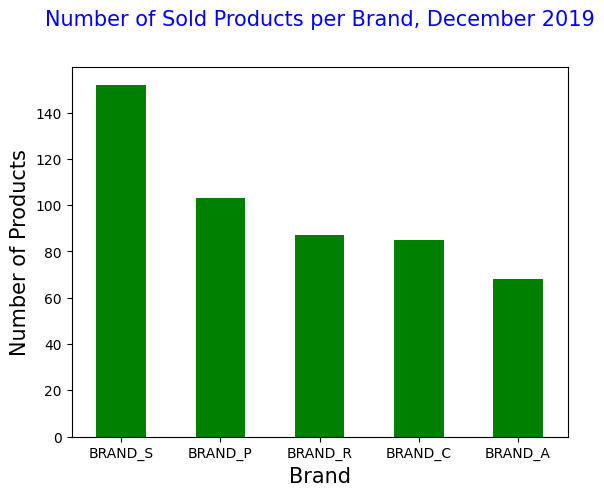

In [ ]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
top_brands = (dataset[dataset['order_month']=='2019-12'].groupby('brand')['quantity']
                .sum()
                .reset_index()
                .sort_values(by='quantity',ascending=False)
                .head(5))
dataset_top5brand_dec = dataset[(dataset['order_month']=='2019-12') & (dataset['brand'].isin(top_brands['brand'].to_list()))]

plt.clf()
dataset_top5brand_dec.groupby('brand')['product_id'].nunique().sort_values(ascending=False).plot(kind='bar', color='green')
plt.title('Number of Sold Products per Brand, December 2019',loc='center',pad=30, fontsize=15, color='blue')
plt.xlabel('Brand', fontsize = 15)
plt.ylabel('Number of Products',fontsize = 15)
plt.ylim(ymin=0)
plt.xticks(rotation=0)
plt.show()

---

# Histogram

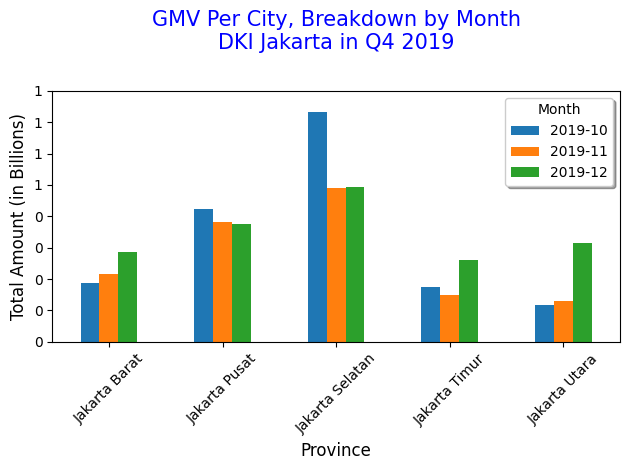

In [ ]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
dataset_dki_q4 = dataset[(dataset['province']=='DKI Jakarta') & (dataset['order_month'] >= '2019-10')]

dataset_dki_q4.groupby(['city','order_month'])['gmv'].sum().unstack().plot(kind='bar')
plt.title('GMV Per City, Breakdown by Month\nDKI Jakarta in Q4 2019',loc='center',pad=30, fontsize=15, color='blue')
plt.xlabel('Province', fontsize = 12)
plt.ylabel('Total Amount (in Billions)',fontsize = 12)
plt.legend(bbox_to_anchor=(1, 1), shadow=True, title='Month')
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

---

# Stacked Bar Chart

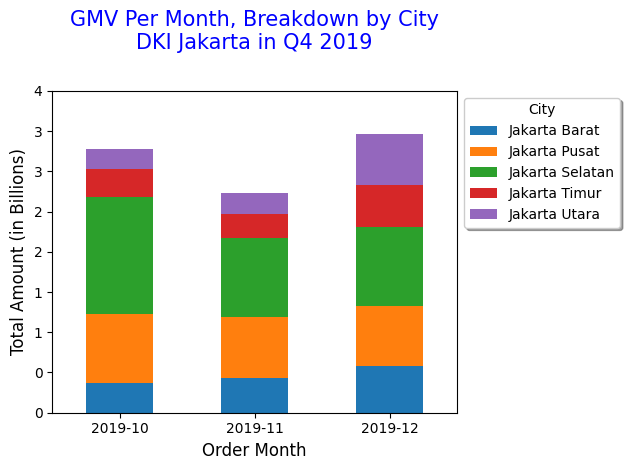

In [ ]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
dataset_dki_q4 = dataset[(dataset['province']=='DKI Jakarta') & (dataset['order_month'] >= '2019-10')]

dataset_dki_q4.groupby(['order_month','city'])['gmv'].sum().sort_values(ascending=False).unstack().plot(kind='bar', stacked=True)
plt.title('GMV Per Month, Breakdown by City\nDKI Jakarta in Q4 2019',loc='center',pad=30, fontsize=15, color='blue')
plt.xlabel('Order Month', fontsize = 12)
plt.ylabel('Total Amount (in Billions)',fontsize = 12)
plt.legend(bbox_to_anchor=(1, 1), shadow=True, ncol=1,title='City')
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

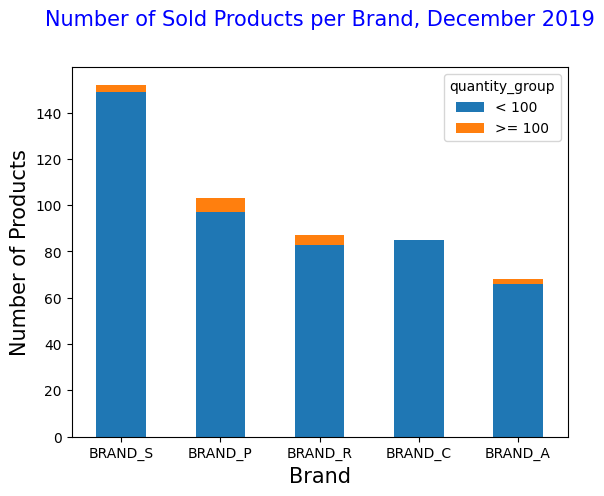

In [ ]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
top_brands = (dataset[dataset['order_month']=='2019-12'].groupby('brand')['quantity']
                .sum()
                .reset_index()
                .sort_values(by='quantity',ascending=False)
                .head(5))
dataset_top5brand_dec = dataset[(dataset['order_month']=='2019-12') & (dataset['brand'].isin(top_brands['brand'].to_list()))]

#membuat dataframe baru, untuk agregat jumlah quantity terjual per product
dataset_top5brand_dec_per_product = dataset_top5brand_dec.groupby(['brand','product_id'])['quantity'].sum().reset_index()

#beri kolom baru untuk menandai product yang terjual >= 100 dan <100
dataset_top5brand_dec_per_product['quantity_group'] = dataset_top5brand_dec_per_product['quantity'].apply(lambda x: '>= 100' if x>=100 else '< 100')
dataset_top5brand_dec_per_product.sort_values('quantity',ascending=False,inplace=True)

#membuat referensi pengurutan brand berdasarkan banyaknya semua product
s_sort = dataset_top5brand_dec_per_product.groupby('brand')['product_id'].nunique().sort_values(ascending=False)

#plot stacked barchart
dataset_top5brand_dec_per_product.groupby(['brand','quantity_group'])['product_id'].nunique().reindex(index=s_sort.index, level='brand').unstack().plot(kind='bar', stacked=True)
plt.title('Number of Sold Products per Brand, December 2019',loc='center',pad=30, fontsize=15, color='blue')
plt.xlabel('Brand', fontsize = 15)
plt.ylabel('Number of Products',fontsize = 15)
plt.ylim(ymin=0)
plt.xticks(rotation=0)
plt.show()

---

# Histogram for Distribution

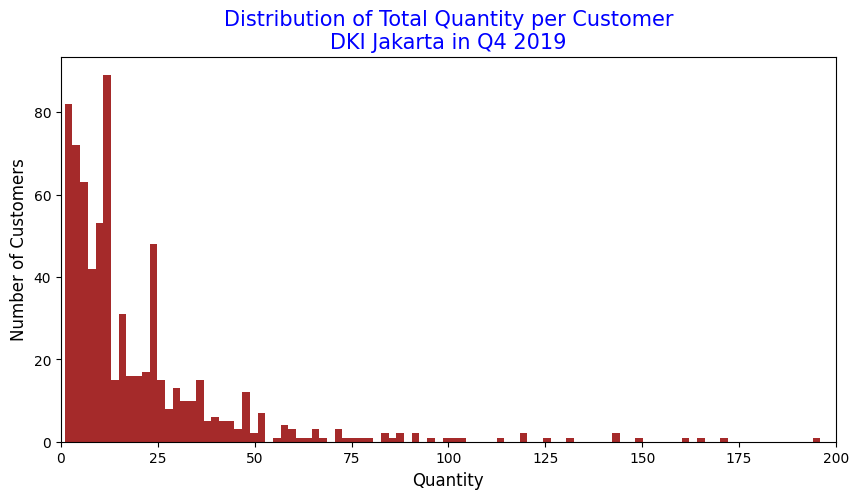

In [ ]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
dataset_dki_q4 = dataset[(dataset['province']=='DKI Jakarta') & (dataset['order_month'] >= '2019-10')]

data_per_customer = (dataset_dki_q4.groupby('customer_id')
                                   .agg({'order_id':'nunique', 
                                         'quantity': 'sum', 
                                         'gmv':'sum'})
                                   .reset_index()
                                   .rename(columns={'order_id':'orders'}))

plt.figure(figsize=(10,5))
plt.hist(data_per_customer['quantity'], bins=100, range=(1,200), color='brown')
plt.title('Distribution of Total Quantity per Customer\nDKI Jakarta in Q4 2019',fontsize=15, color='blue')
plt.xlabel('Quantity', fontsize = 12)
plt.ylabel('Number of Customers',fontsize = 12)
plt.xlim(xmin=0,xmax=200)
plt.show()

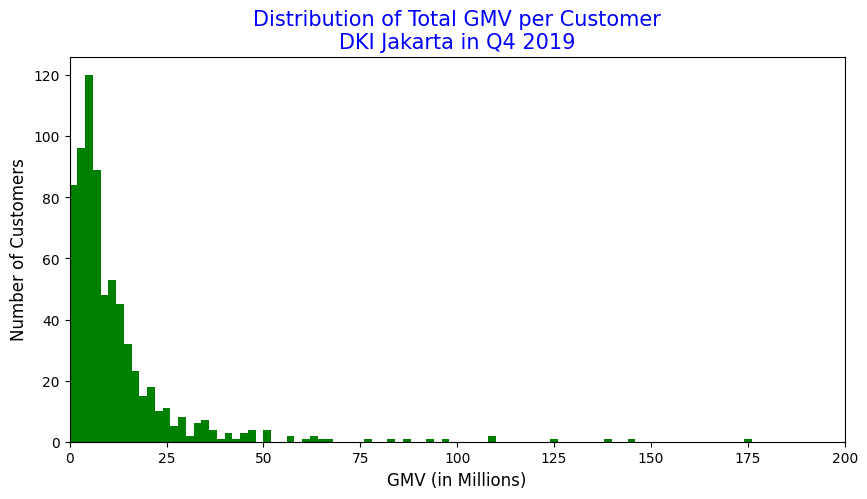

In [ ]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
dataset_dki_q4 = dataset[(dataset['province']=='DKI Jakarta') & (dataset['order_month'] >= '2019-10')]

data_per_customer = (dataset_dki_q4.groupby('customer_id')
                                   .agg({'order_id':'nunique', 
                                         'quantity': 'sum', 
                                         'gmv':'sum'})
                                   .reset_index()
                                   .rename(columns={'order_id':'orders'}))

plt.figure(figsize=(10,5))
plt.hist(data_per_customer['gmv'], bins=100, range=(1,200000000), color='green')
plt.title('Distribution of Total GMV per Customer\nDKI Jakarta in Q4 2019',fontsize=15, color='blue')
plt.xlabel('GMV (in Millions)', fontsize = 12)
plt.ylabel('Number of Customers',fontsize = 12)
plt.xlim(xmin=0,xmax=200000000)
labels, locations = plt.xticks()
plt.xticks(labels, (labels/1000000).astype(int))
plt.show()

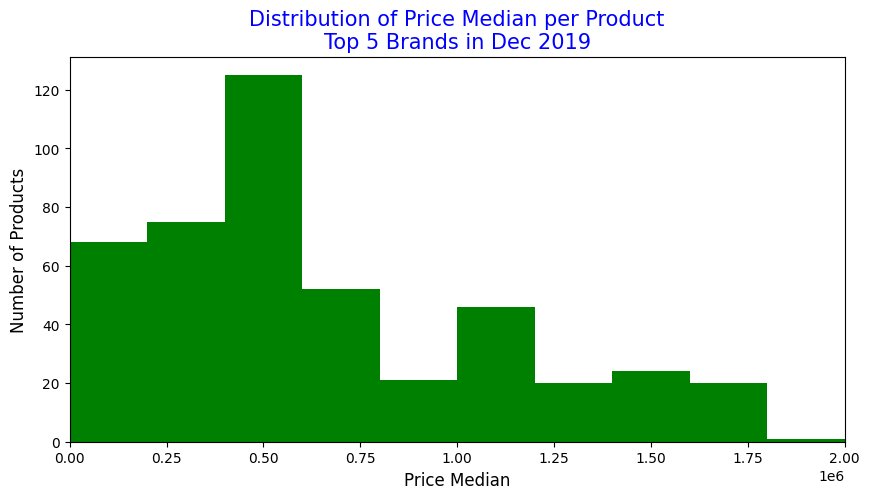

In [ ]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
top_brands = (dataset[dataset['order_month']=='2019-12'].groupby('brand')['quantity']
                .sum()
                .reset_index()
                .sort_values(by='quantity',ascending=False)
                .head(5))
dataset_top5brand_dec = dataset[(dataset['order_month']=='2019-12') & (dataset['brand'].isin(top_brands['brand'].to_list()))]

plt.figure(figsize=(10,5))
plt.hist(dataset_top5brand_dec.groupby('product_id')['item_price'].median(), bins=10, stacked=True, range=(1,2000000), color='green')
plt.title('Distribution of Price Median per Product\nTop 5 Brands in Dec 2019',fontsize=15, color='blue')
plt.xlabel('Price Median', fontsize = 12)
plt.ylabel('Number of Products',fontsize = 12)
plt.xlim(xmin=0,xmax=2000000)
plt.show()

---

# Scatter Plot

<Figure size 640x480 with 0 Axes>

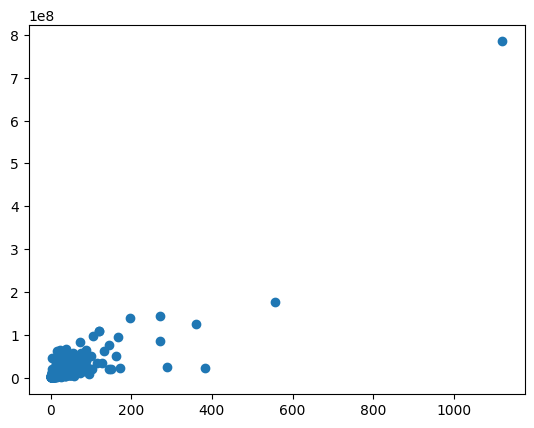

In [ ]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
dataset_dki_q4 = dataset[(dataset['province']=='DKI Jakarta') & (dataset['order_month'] >= '2019-10')]

data_per_customer = (dataset_dki_q4.groupby('customer_id')
                                   .agg({'order_id':'nunique', 
                                         'quantity': 'sum', 
                                         'gmv':'sum'})
                                   .reset_index()
                                   .rename(columns={'order_id':'orders'}))

plt.clf()
# Scatterplot pertama
plt.figure()
plt.scatter(data_per_customer['quantity'], data_per_customer['gmv'])
plt.show()

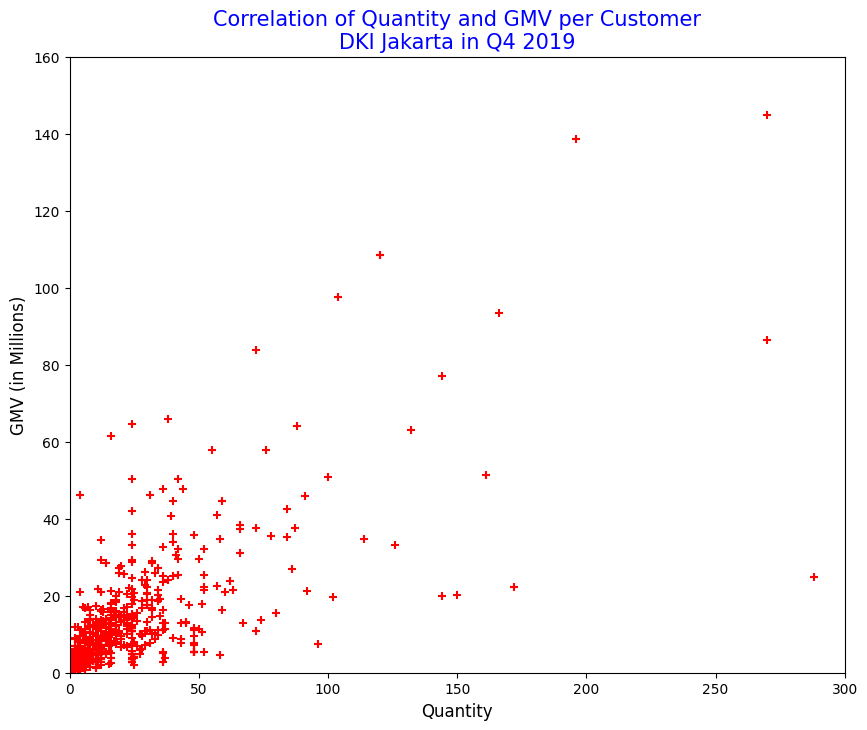

In [ ]:
# Scatterplot kedua: perbaikan scatterplot pertama
plt.figure(figsize=(10,8))
plt.scatter(data_per_customer['quantity'],data_per_customer['gmv'], marker='+', color='red')
plt.title('Correlation of Quantity and GMV per Customer\nDKI Jakarta in Q4 2019',fontsize=15, color='blue')
plt.xlabel('Quantity', fontsize = 12)
plt.ylabel('GMV (in Millions)',fontsize = 12)
plt.xlim(xmin=0,xmax=300)
plt.ylim(ymin=0,ymax=150000000)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int))
plt.show()

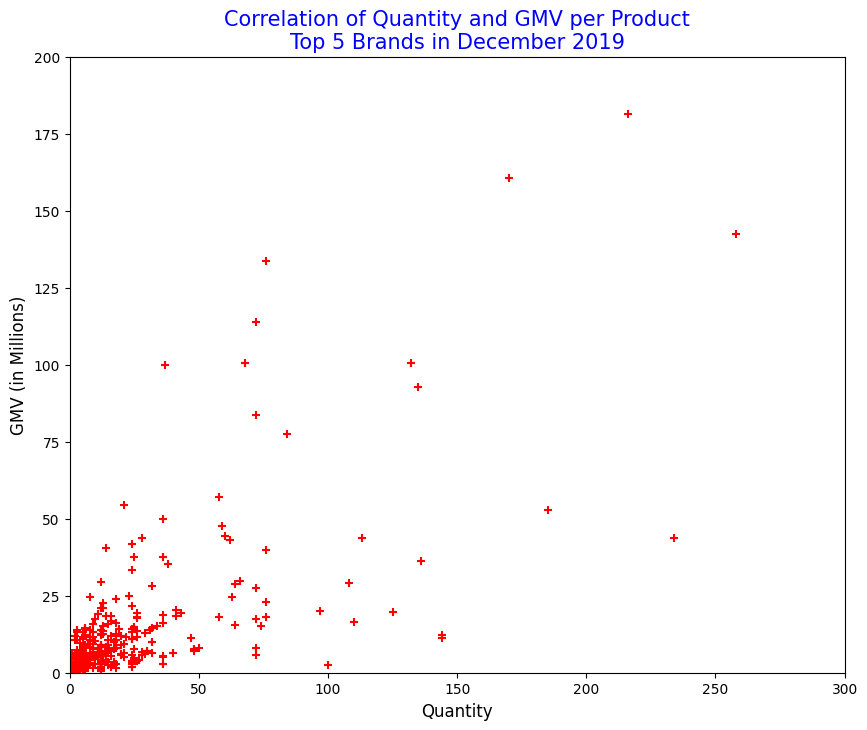

In [ ]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
top_brands = (dataset[dataset['order_month']=='2019-12'].groupby('brand')['quantity']
                .sum()
                .reset_index()
                .sort_values(by='quantity',ascending=False)
                .head(5))
dataset_top5brand_dec = dataset[(dataset['order_month']=='2019-12') & (dataset['brand'].isin(top_brands['brand'].to_list()))]

#agregat per product
data_per_product_top5brand_dec = dataset_top5brand_dec.groupby('product_id').agg({'quantity': 'sum', 'gmv':'sum', 'item_price':'median'}).reset_index()

#scatter plot
plt.figure(figsize=(10,8))
plt.scatter(data_per_product_top5brand_dec['quantity'],data_per_product_top5brand_dec['gmv'], marker='+', color='red')
plt.title('Correlation of Quantity and GMV per Product\nTop 5 Brands in December 2019',fontsize=15, color='blue')
plt.xlabel('Quantity', fontsize = 12)
plt.ylabel('GMV (in Millions)',fontsize = 12)
plt.xlim(xmin=0,xmax=300)
plt.ylim(ymin=0,ymax=200000000)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int))
plt.show()

<Figure size 640x480 with 0 Axes>

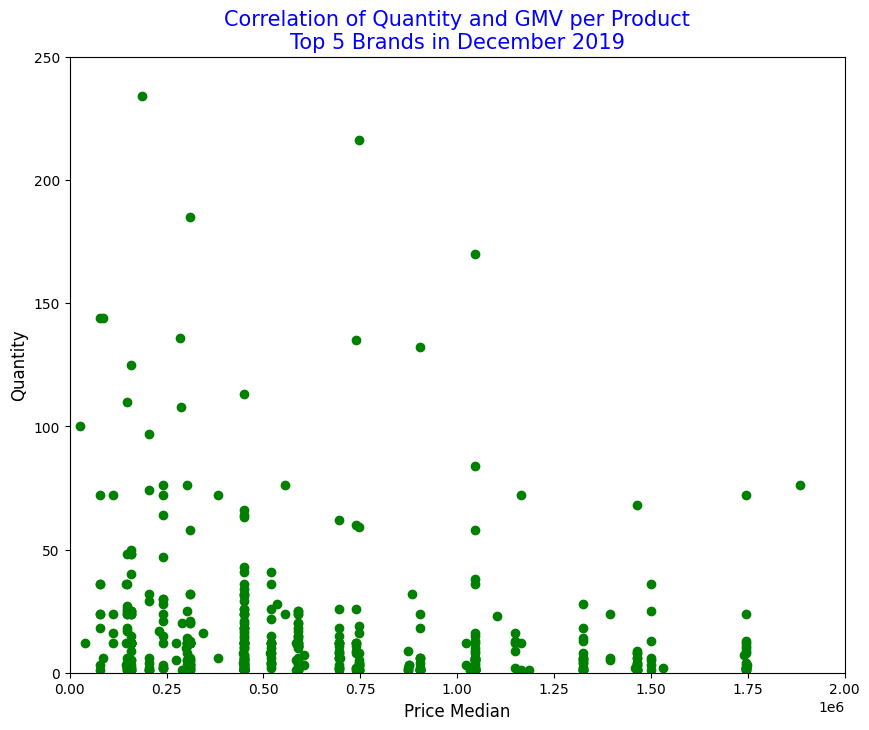

In [ ]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
top_brands = (dataset[dataset['order_month']=='2019-12'].groupby('brand')['quantity']
                .sum()
                .reset_index()
                .sort_values(by='quantity',ascending=False)
                .head(5))
dataset_top5brand_dec = dataset[(dataset['order_month']=='2019-12') & (dataset['brand'].isin(top_brands['brand'].to_list()))]

plt.clf()
#agregat per product
data_per_product_top5brand_dec = dataset_top5brand_dec.groupby('product_id').agg({'quantity': 'sum', 'gmv':'sum', 'item_price':'median'}).reset_index()

#scatter plot
plt.figure(figsize=(10,8))
plt.scatter(data_per_product_top5brand_dec['item_price'],data_per_product_top5brand_dec['quantity'], marker='o', color='green')
plt.title('Correlation of Quantity and GMV per Product\nTop 5 Brands in December 2019',fontsize=15, color='blue')
plt.xlabel('Price Median', fontsize = 12)
plt.ylabel('Quantity',fontsize = 12)
plt.xlim(xmin=0,xmax=2000000)
plt.ylim(ymin=0,ymax=250)
plt.show()

---

# Multi Line Chart

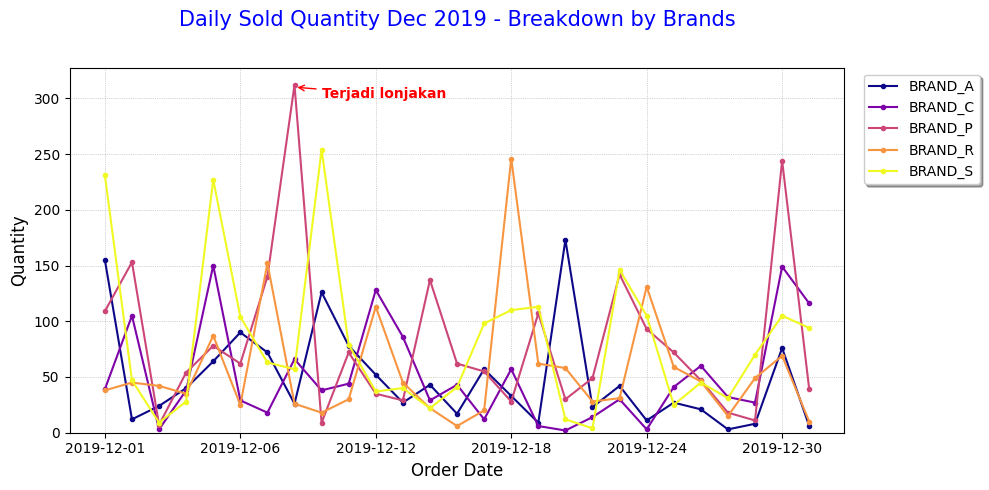

In [ ]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
top_brands = (dataset[dataset['order_month']=='2019-12'].groupby('brand')['quantity']
                .sum()
                .reset_index()
                .sort_values(by='quantity',ascending=False)
                .head(5))
dataset_top5brand_dec = dataset[(dataset['order_month']=='2019-12') & (dataset['brand'].isin(top_brands['brand'].to_list()))]

dataset_top5brand_dec.groupby(['order_date','brand'])['quantity'].sum().unstack().plot(marker='.', cmap='plasma')
plt.title('Daily Sold Quantity Dec 2019 - Breakdown by Brands',loc='center',pad=30, fontsize=15, color='blue')
plt.xlabel('Order Date', fontsize = 12)
plt.ylabel('Quantity',fontsize = 12)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)
plt.annotate('Terjadi lonjakan', xy=(7, 310), xytext=(8, 300),
             weight='bold', color='red',
             arrowprops=dict(arrowstyle='->',
                             connectionstyle="arc3",
                             color='red'))
plt.gcf().set_size_inches(10, 5)
plt.tight_layout()
plt.show()